# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [5]:
transactions = transactions.astype({'DAY': 'int16', 'QUANTITY': 'int32', 'STORE_ID': 'int32', 'WEEK_NO': 'int8'})

In [6]:
transactions.isna().any()

household_key        False
BASKET_ID            False
DAY                  False
PRODUCT_ID           False
QUANTITY             False
SALES_VALUE          False
STORE_ID             False
RETAIL_DISC          False
WEEK_NO              False
COUPON_DISC          False
COUPON_MATCH_DISC    False
dtype: bool

In [7]:
len(transactions['household_key'].unique())

2099

In [8]:
len(transactions['PRODUCT_ID'].unique())

84138

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [9]:
transactions = transactions.assign(total_discount = transactions['RETAIL_DISC'] + transactions['COUPON_DISC'], 
                                   pct_discount = (lambda x: (x['total_discount'] / x['SALES_VALUE']).abs()))
transactions['pct_discount'] = transactions['pct_discount'].where(transactions['pct_discount']<1,1.0).where(transactions['pct_discount']>0,0)

In [10]:
transactions.drop(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis = 1)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [11]:
total_sales = transactions['SALES_VALUE'].sum()
total_sales

6666243.499999999

In [12]:
total_discount = abs(transactions['total_discount'].sum())
total_discount

1178658.0799999998

In [13]:
overall_percentage_discount = round(total_discount / total_sales, 2)
overall_percentage_discount

0.18

In [14]:
total_quantity_sold = transactions['QUANTITY'].sum()
total_quantity_sold

216713611

In [15]:
transactions.iloc[transactions['QUANTITY'].idxmax()]

household_key        6.300000e+02
BASKET_ID            3.474915e+10
DAY                  5.030000e+02
PRODUCT_ID           6.534178e+06
QUANTITY             8.963800e+04
SALES_VALUE          2.500000e+02
STORE_ID             3.840000e+02
RETAIL_DISC         -1.345000e+01
WEEK_NO              7.300000e+01
COUPON_DISC          0.000000e+00
COUPON_MATCH_DISC    0.000000e+00
total_discount      -1.345000e+01
pct_discount         5.380000e-02
Name: 1442095, dtype: float64

In [16]:
total_sales_per_basket = round(total_sales/transactions['BASKET_ID'].nunique(), 2)
total_sales_per_household = round(total_sales/transactions['household_key'].nunique(), 2)
print(total_sales_per_basket)
print(total_sales_per_household)

28.62
3175.91


In [17]:
#Total sales value per basket (sum of sales value / nunique basket_id).
#Total sales value per household (sum of sales value / nunique household_key).

transactions = transactions.assign(total_sales_per_basket = transactions.groupby(['BASKET_ID'])['SALES_VALUE'].transform('sum'))
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,pct_discount,total_sales_per_basket
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000,11.37
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779,11.37
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000,11.37
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000,11.37
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.000000,11.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0,0.00,0.000000,32.32
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0,0.00,0.000000,32.32
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0,0.00,0.000000,32.32
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0,-0.49,0.108889,32.32


In [18]:
transactions = transactions.assign(total_sales_per_household = transactions.groupby(['household_key'])['SALES_VALUE'].transform('sum'))
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,pct_discount,total_sales_per_basket,total_sales_per_household
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000,11.37,2466.05
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779,11.37,2466.05
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000,11.37,2466.05
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000,11.37,2466.05
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.000000,11.37,2466.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0,0.00,0.000000,32.32,11516.83
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0,0.00,0.000000,32.32,11516.83
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0,0.00,0.000000,32.32,11516.83
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0,-0.49,0.108889,32.32,11516.83


## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


<Axes: xlabel='household_key', ylabel='sum_of_sales'>

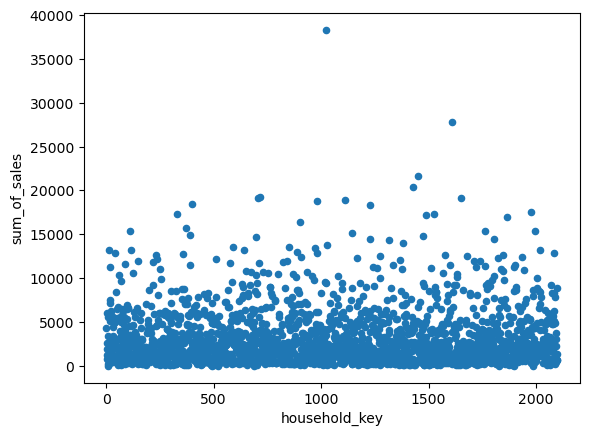

In [19]:
household_dist = transactions.groupby(['household_key']).agg(sum_of_sales=('SALES_VALUE', 'sum')).reset_index()
household_dist.plot.scatter(x='household_key', y='sum_of_sales')


In [20]:
top_by_quantity =  (transactions.groupby('household_key').agg(top_10 = ('QUANTITY', 'sum'))).sort_values(by = 'top_10', ascending = False).iloc[:10]

top_by_sales =  (transactions.groupby('household_key').agg(top_10 = ('SALES_VALUE', 'sum'))).sort_values(by = 'top_10', ascending = False).iloc[:10]
print(top_by_sales)
print(top_by_quantity)

                 top_10
household_key          
1023           38319.79
1609           27859.68
1453           21661.29
1430           20352.99
718            19299.86
707            19194.42
1653           19153.75
1111           18894.72
982            18790.34
400            18494.14
                top_10
household_key         
1023           4479917
755            3141769
1609           2146715
13             1863829
1430           1741892
1527           1734632
1762           1669880
707            1640193
1029           1496204
1314           1492863


<Axes: xlabel='household_key'>

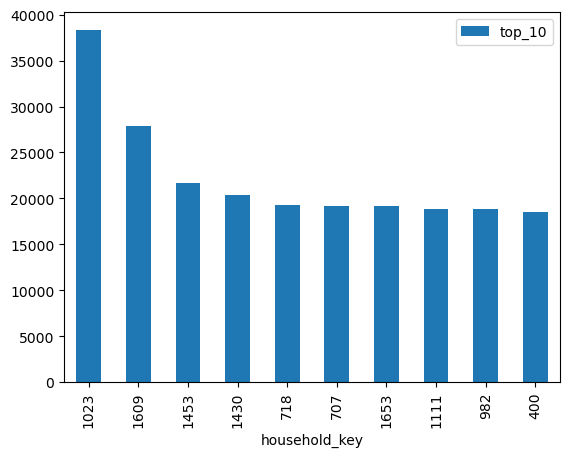

In [21]:
top_by_sales.plot.bar()

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

<Axes: title={'center': 'Sales by Product'}, xlabel='Sales Value', ylabel='Product'>

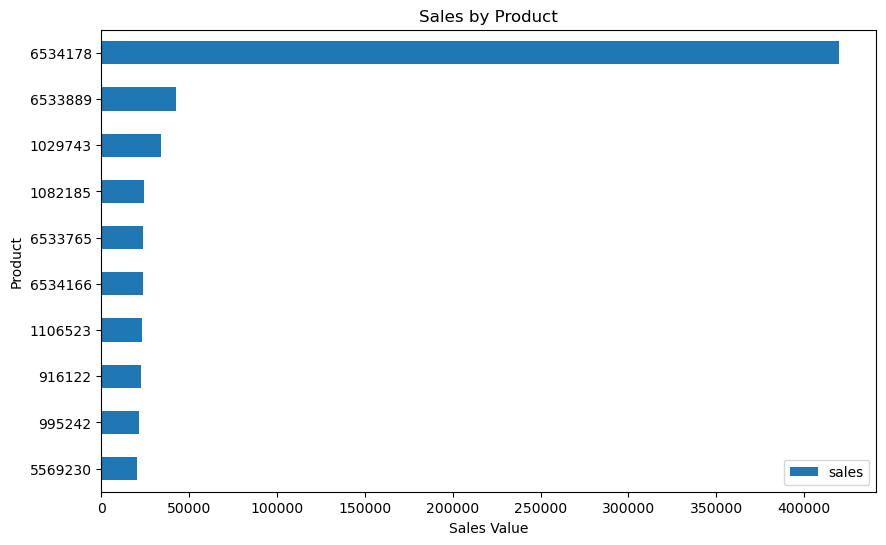

In [22]:
top_by_product = (transactions.groupby('PRODUCT_ID').agg(sales=('SALES_VALUE', 'sum')).sort_values(by='sales', ascending=False)).iloc[:10]
top_by_product.sort_values(by='sales', ascending=True).plot(kind='barh', 
                    stacked=False, 
                    figsize=(10, 6),
                    title='Sales by Product',
                    xlabel='Sales Value',
                    ylabel='Product'
                   )

In [36]:
top_by_product = (transactions.groupby('PRODUCT_ID').agg(sales=('SALES_VALUE', 'sum')).sort_values(by='sales', ascending=False)).iloc[:10]
top_by_product

,sales
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


In [40]:
total_discount = (transactions.query('PRODUCT_ID in @top_by_product.index')['total_discount'].sum())

total_sales = (transactions.query('PRODUCT_ID in @top_by_product.index')['SALES_VALUE'].sum())
total_discount / total_sales

-0.10331267387397927

In [56]:
products = pd.read_csv('../project_data/product.csv')

In [57]:
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [76]:
top_hh_product = (transactions.query('household_key in @top_by_sales.index').loc[:, 'PRODUCT_ID'].value_counts().iloc[:10]).index

In [77]:
top_hh_product

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')

In [78]:
products.query('PRODUCT_ID in @top_hh_product')

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [79]:
products.query('PRODUCT_ID == 6534178')


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [84]:
products.query('PRODUCT_ID in @top_by_product.index')

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
